<a href="https://colab.research.google.com/github/Seunsoipe/R/blob/main/Multivariate_Analysis_With_Python_Checkpoint.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##Objective

In this step, you are asked for analysing the whole data already used in the previous checkpoints, by applying the principal component analysis.

Instructions

1. Load your data as usual

2. Standardize your data

3. Compute the correlation matrix

4. Plot the covariance matrix to identify the correlation between features 

5. Apply the PCA on your data

6. Plot the appropriate visualization after reducing the dimension of our data.

Don’t forget to implement this work with both R and python

In [1]:
from google.colab import files

uploaded = files.upload()

Saving HR data.csv to HR data.csv


In [2]:
import pandas as pd

In [3]:
data = pd.read_csv('HR data.csv')

In [4]:
data.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,sales,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


In [5]:
data.size

149990

In [7]:
data.shape

(14999, 10)

In [8]:
data.describe()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000
mean,0.612834,0.716102,3.803054,201.050337,3.498233,0.144610,0.238083,0.021268
std,0.248631,0.171169,1.232592,49.943099,1.460136,0.351719,0.425924,0.144281
min,0.090000,0.360000,2.000000,96.000000,2.000000,0.000000,0.000000,0.000000
25%,0.440000,0.560000,3.000000,156.000000,3.000000,0.000000,0.000000,0.000000
50%,0.640000,0.720000,4.000000,200.000000,3.000000,0.000000,0.000000,0.000000
75%,0.820000,0.870000,5.000000,245.000000,4.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,7.000000,310.000000,10.000000,1.000000,1.000000,1.000000


In [9]:
from sklearn.preprocessing import StandardScaler

##Data standardization
Since PCA is affected by scale so you need to scale the features in your data before applying PCA. we use StandardScaler to help you standardize the dataset’s features onto unit scale (mean = 0 and variance = 1)

In [10]:
features = ['satisfaction_level',	'last_evaluation',	'number_project',	'average_montly_hours',	'time_spend_company',	'Work_accident',	'left',	'promotion_last_5years']
# extracting out the features
x = data.loc[:, features].values
# Standardizing the features
x_standardized = StandardScaler().fit_transform(x)
x_standardized

array([[-0.93649469, -1.08727529, -1.46286291, ..., -0.41116529,
         1.788917  , -0.14741182],
       [ 0.75281433,  0.84070693,  0.97111292, ..., -0.41116529,
         1.788917  , -0.14741182],
       [-2.02247906,  0.95755433,  2.59376348, ..., -0.41116529,
         1.788917  , -0.14741182],
       ...,
       [-0.97671633, -1.08727529, -1.46286291, ..., -0.41116529,
         1.788917  , -0.14741182],
       [-2.02247906,  1.42494396,  1.7824382 , ..., -0.41116529,
         1.788917  , -0.14741182],
       [-0.97671633, -1.14569899, -1.46286291, ..., -0.41116529,
         1.788917  , -0.14741182]])

##Now we compute the  covariance matrix:

In [11]:
import numpy as np
cov_data = np.corrcoef(x.T)
cov_data

array([[ 1.        ,  0.10502121, -0.14296959, -0.02004811, -0.10086607,
         0.05869724, -0.38837498,  0.02560519],
       [ 0.10502121,  1.        ,  0.34933259,  0.3397418 ,  0.13159072,
        -0.00710429,  0.00656712, -0.00868377],
       [-0.14296959,  0.34933259,  1.        ,  0.41721063,  0.19678589,
        -0.00474055,  0.02378719, -0.00606396],
       [-0.02004811,  0.3397418 ,  0.41721063,  1.        ,  0.12775491,
        -0.01014289,  0.07128718, -0.00354441],
       [-0.10086607,  0.13159072,  0.19678589,  0.12775491,  1.        ,
         0.00212042,  0.14482217,  0.06743293],
       [ 0.05869724, -0.00710429, -0.00474055, -0.01014289,  0.00212042,
         1.        , -0.15462163,  0.03924543],
       [-0.38837498,  0.00656712,  0.02378719,  0.07128718,  0.14482217,
        -0.15462163,  1.        , -0.06178811],
       [ 0.02560519, -0.00868377, -0.00606396, -0.00354441,  0.06743293,
         0.03924543, -0.06178811,  1.        ]])

##Now, let’s plot the covariance matrix to identify the correlation between features using a heatmap:

<function matplotlib.pyplot.show(*args, **kw)>

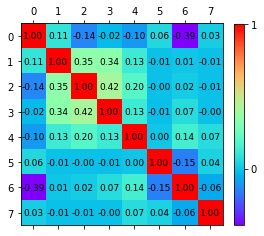

In [13]:
import matplotlib.pyplot as plt
img = plt.matshow(cov_data, cmap=plt.cm.rainbow)
plt.colorbar(img, ticks = [-1, 0, 1], fraction=0.045)
for x in range(cov_data.shape[0]):
    for y in range(cov_data.shape[1]):
        plt.text(x, y, "%0.2f" % cov_data[x,y], size=9, color='black', ha="center", va="center")
        
plt.show

##PCA Projection to 2D
The original data has 8 columns ('satisfaction_level',	'last_evaluation',	'number_project',	'average_montly_hours',	'time_spend_company',	'Work_accident',	'left' and	'promotion_last_5years'). In this step, we will project the original data which is 4 dimensional into 2 dimensions.

In [14]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
principal_components=pca.fit_transform(x_standardized)
principalDF=pd.DataFrame(data=principal_components, columns= ['principal component 1', 'principal component 2'])
finalDf = pd.concat([principalDF, data[['salary']]], axis = 1)
finalDf

,principal component 1,principal component 2,salary
0,-1.304221,-2.440874,low
1,2.416479,-0.378320,medium
2,3.548439,-1.634946,medium
3,1.865397,-0.615025,low
4,-1.302636,-2.476430,low
...,...,...,...
14994,-1.274266,-2.340427,low
14995,-1.400461,-2.545822,low
14996,-1.443936,-2.515388,low
14997,3.397386,-1.559837,low


##Final visualization of PCA
And finally, we are going to plot 2 dimensional data after reduction.

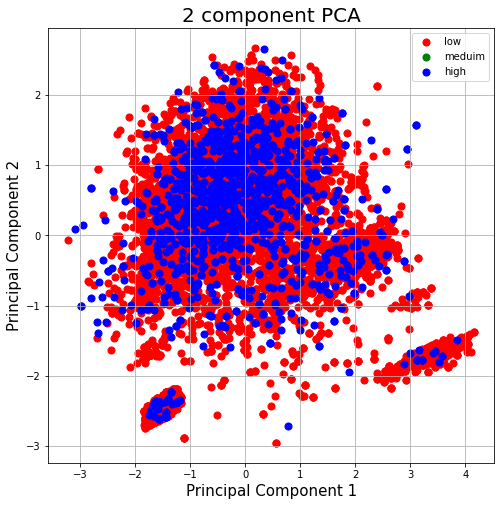

In [15]:
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('2 component PCA', fontsize = 20)
targets = ['low', 'meduim', 'high']
colors = ['r', 'g', 'b']
for target, color in zip(targets,colors):
    indicesToKeep = finalDf['salary'] == target
    ax.scatter(finalDf.loc[indicesToKeep, 'principal component 1']
               , finalDf.loc[indicesToKeep, 'principal component 2']
               , c = color
               , s = 50)
ax.legend(targets)
ax.grid()